In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#run
import os
import numpy as np
import pandas as pd
import seaborn as sn
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import random
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import itertools
import math
import datetime
import time


In [ ]:
import warnings
import os

data = '/content/drive/MyDrive/Project/Disertasi2023/satelit/basedir'
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir(data)
print(data_dir_list)
path, dirs, files = next(os.walk(data))
file_count = len(files)
print(file_count)

['cb', 'non_cb']
0


In [ ]:
# Make new base directory
base_dir = '/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split'
#os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)


In [ ]:
#Under train folder create five folders


train_cb_dir = os.path.join(train_dir, 'cumulonimbus')
#os.mkdir(train_cb_dir)

train_noncb_dir = os.path.join(train_dir, 'non_cumulonimbus')
#os.mkdir(train_noncb_dir)

validation_cb_dir = os.path.join(validation_dir, 'cumulonimbus')
#os.mkdir(validation_cb_dir)

validation_noncb_dir = os.path.join(validation_dir, 'non_cumulonimbus')
#os.mkdir(validation_noncb_dir)

In [ ]:
#run
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
CB_SOURCE_DIR = '/content/drive/MyDrive/Project/Disertasi2023/satelit/basedir/cb/'
TRAINING_CB_DIR = '/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split/train/cumulonimbus/'
VALID_CB_DIR = '/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split/validation/cumulonimbus/'

NONCB_SOURCE_DIR = '/content/drive/MyDrive/Project/Disertasi2023/satelit/basedir/non_cb/'
TRAINING_NONCB_DIR = '/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split/train/non_cumulonimbus/'
VALID_NONCB_DIR = '/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split/validation/non_cumulonimbus/'

In [ ]:
'''split_size = .80

split_data(CB_SOURCE_DIR, TRAINING_CB_DIR, VALID_CB_DIR, split_size)
split_data(NONCB_SOURCE_DIR, TRAINING_NONCB_DIR, VALID_NONCB_DIR, split_size)
'''

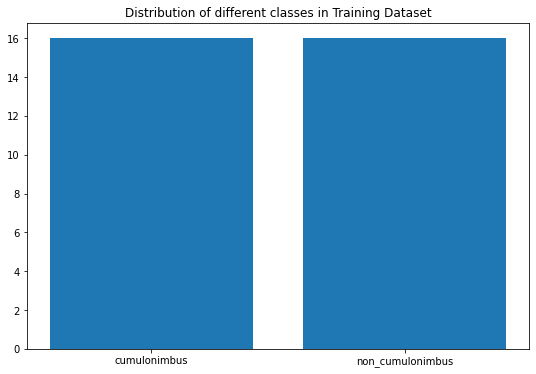

In [ ]:
#run
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['cumulonimbus', 'non_cumulonimbus']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['cumulonimbus', 'non_cumulonimbus']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split/train/'+i+'/'))))

Training cumulonimbus images are: 16
Training non_cumulonimbus images are: 16


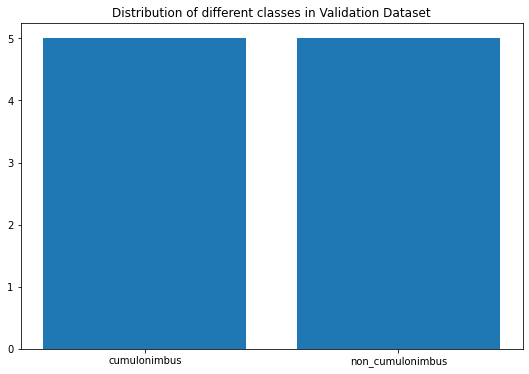

In [ ]:
image_folder = ['cumulonimbus', 'non_cumulonimbus']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in ['cumulonimbus', 'non_cumulonimbus']:
    print('Validation {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split/validation/'+i+'/'))))

Validation cumulonimbus images are: 5
Validation non_cumulonimbus images are: 5


In [ ]:
#run
img_width=150; img_height=150


batch_size=32

TRAINING_DIR = '/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split/train/'

train_datagen = ImageDataGenerator(rescale= 1/255.0,
                                   rotation_range= 30,
                                   zoom_range= 0.2,
                                   shear_range= 0.2,
                                   fill_mode= 'nearest',
                                   horizontal_flip= True
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

VALIDATION_DIR = '/content/drive/MyDrive/Project/Disertasi2023/satelit/data_split/validation/'

validation_datagen = ImageDataGenerator(rescale= 1/255.0
                                        )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

#Number of items from the data to takes the training model. If you use the batch size of one you update weights after every sample. If you use batch size 32, you calculate the average error and then update weights every 32 items.

Found 32 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
#callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/Project/Disertasi2023/satelit/best_model.h5'
metric = 'val_accuracy'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
input_shape=(img_height, img_width, 3)
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape = input_shape, padding = "same"),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),


    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics =['accuracy'])

In [ ]:
start = datetime.datetime.now()
history = model.fit_generator(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )


Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.7040 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/Project/Disertasi2023/satelit/best_model.h5
1/1 [==============================] - 16s 16s/step - loss: 0.7040 - accuracy: 0.5000 - val_loss: 7.4859 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 7.3112 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.50000
1/1 [==============================] - 12s 12s/step - loss: 7.3112 - accuracy: 0.5000 - val_loss: 1.7747 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 1.7201 - accuracy: 0.5000
Epoch 3: val_accuracy did not improve from 0.50000
1/1 [==============================] - 14s 14s/step - loss: 1.7201 - accuracy: 0.5000 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.6986 - accuracy: 0.5000
Epoch 

In [ ]:
(val_loss, val_accuracy) = model.evaluate(
    validation_generator,
    batch_size=batch_size,
    verbose=1)

print('[INFO] accuracy: {:.2f}%'.format(val_accuracy * 100))
print('[INFO] Loss: {:.2f}%'.format(val_loss))
end = datetime.datetime.now()
elapsed = end-start
print('Time: ', elapsed)

1/1 [==============================] - 2s 2s/step - loss: 0.6931 - accuracy: 0.5000
[INFO] accuracy: 50.00%
[INFO] Loss: 0.69%
Time:  0:27:47.938755


In [ ]:
(train_loss, train_accuracy) = model.evaluate(
    train_generator,
    batch_size=batch_size,
    verbose=1)

print('[INFO] accuracy: {:.2f}%'.format(train_accuracy * 100))
print('[INFO] Loss: {:.2f}%'.format(train_loss))
end = datetime.datetime.now()
elapsed = end-start
print('Time: ', elapsed)

1/1 [==============================] - 8s 8s/step - loss: 0.6931 - accuracy: 0.5000
[INFO] accuracy: 50.00%
[INFO] Loss: 0.69%
Time:  0:28:05.319422


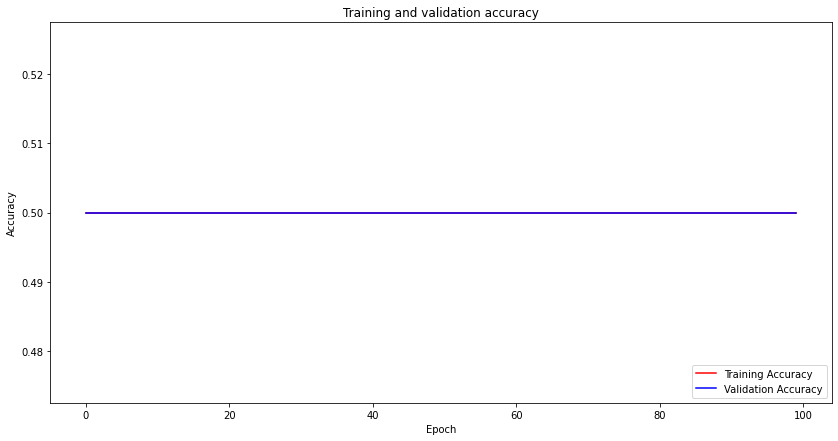

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

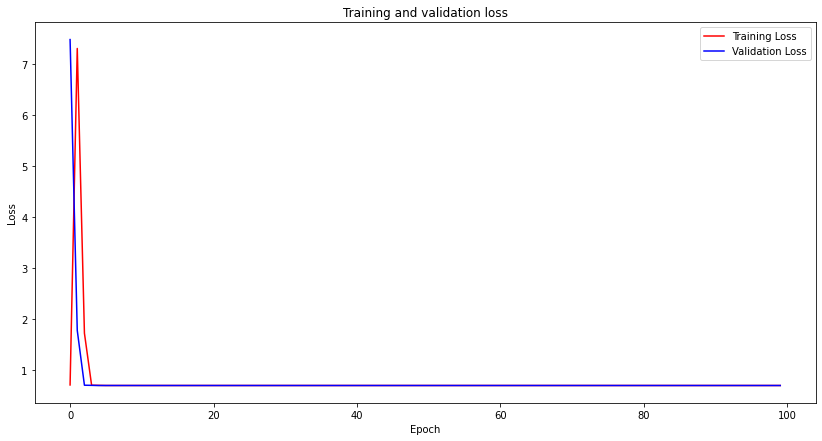

In [ ]:

fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
model = load_model(best_model_file)

========= CONFUSION MATRIX =========
[[5 0]
 [5 0]]
============== RESULT ==============
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10

Confusion matrix, without normalization


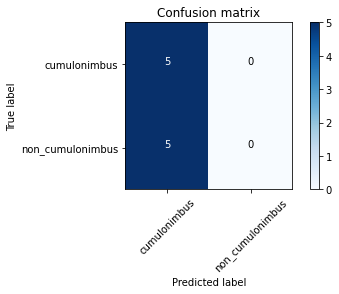

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

predict = model.predict_generator(validation_generator)
pred = np.argmax(predict, axis=1)
cm = confusion_matrix(validation_generator.classes,pred)

def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues) :

      if normalize:
          cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
          print('Normalized confusion matrix')

      else: print('Confusion matrix, without normalization')

      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=45)
      plt.yticks(tick_marks, classes)

      fmt = '.2f' if normalize else 'd'
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

print("========= CONFUSION MATRIX =========")
print(cm)

print("============== RESULT ==============")
print(classification_report(validation_generator.classes,pred))


plot_confusion_matrix(cm, ['cumulonimbus', 'non_cumulonimbus'], normalize = False)

In [ ]:

%matplotlib inline
uploaded = files.upload()
for fn in uploaded.keys():
       path = fn
       img = image.load_img(path, target_size=(150,150))
       imgplot = plt.imshow(img)
       x = image.img_to_array(img)
       x = np.expand_dims(x, axis=0)
       x = x/255
       images = np.vstack([x])
       classes = model.predict(images, batch_size=32)

       print(fn)
       print(classes)
       if np.argmax(classes[0]) == 0:
         print('Cumulonimbus')

       else:
          print('Non Cumulunimbus')



AttributeError: ignored